[View in Colaboratory](https://colab.research.google.com/github/MicroprocessorX069/Keypoint-detection-of-Image/blob/master/Keypoint_detection_.ipynb)

In [0]:
from google.colab import drive
drive.mount('/gdrive')

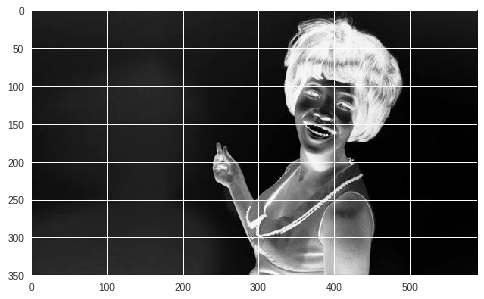

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
#uploading file from local system

#from google.colab import files
#uploaded = files.upload()
#reading the image using cv2.imread

input_image=cv2.imread("task1.jpg",0) #make sure the path to the image is in String format

#print(input_image)
plt.imshow(input_image)


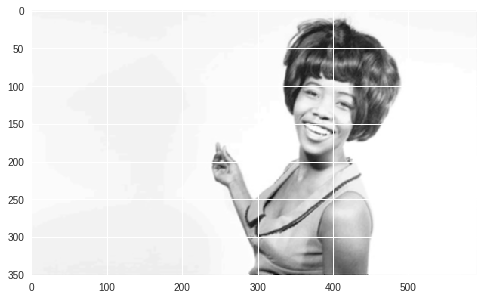

In [3]:
import numpy as np
#input_image=np.array([[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0]])
#plt.imshow(input_image)
input_image=np.array(input_image)
padded_input=np.pad(input_image,(1,1),'constant')
padded_input=np.array(padded_input)

#new_image2=np.zeros((len(input_image),len(input_image[0])))
for x in range(len(input_image)):
  for y in range(len(input_image[0])):
      input_image[x,y]=255-input_image[x,y]
plt.imshow(input_image)      

kernel=np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
new_image=np.zeros((len(input_image),len(input_image[0])))
for input_x in range(len(input_image)):
  for input_y in range(len(input_image[0])):
     padded_input[input_x,input_y]=0
     for kernel_x in range(len(kernel)):
         for kernel_y in range(len(kernel[0])):
             padded_input[input_x,input_y]=padded_input[input_x,input_y]+padded_input[input_x+kernel_x, input_y+kernel_y]*kernel[kernel_x,kernel_y]
plt.imshow(padded_input)                        